# Logistic polynomial regression

Goals:
- hand-code the logistic regression using second degree polynomial on toy dataset
- train the algorithm
- estimate the error

## Import basic libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Create a toy dataset

In [2]:
import math

N = 100
D = 3

# data is coming from 2 normal distributions
# first 2 dimensions are features
# third dimension is label
def generate_data(n, mu1, sigma1, mu2, sigma2, label):
    data = np.empty([n, D], dtype=float)
    data[:, 0] = sigma1 * np.random.randn(n) + mu1
    data[:, 1] = sigma2 * np.random.randn(n) + mu2
    data[:, 2] = label
    return data

# combine samples from 2 datasets together

data = np.empty([N, D], dtype=float)
half_N = math.floor(N / 2)
data[:half_N] = generate_data(half_N, 1.0, 0.5, 1.0, 0.5, 0.0)
data[half_N:] = generate_data(half_N, 1.5, 0.5, 2.0, 0.5, 1.0)
np.random.shuffle(data)

data[:5]

array([[1.07872784, 1.44200905, 0.        ],
       [1.41154501, 1.91204002, 0.        ],
       [0.82660848, 1.06862056, 0.        ],
       [1.34642224, 1.84234925, 1.        ],
       [0.59066337, 0.77567681, 0.        ]])

## Plot the toy dataset

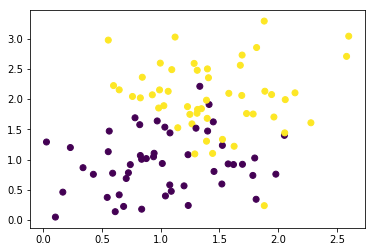

In [3]:
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
plt.show()

## Model the classifier

In [4]:
# Our model is: y = sigmoid(w1*x1 + w2*x1*x1 + w3*x2 + b)

# calculate line 0 = w1*x1 + w2*x1*x1 + w3*x2 + b
def z(x):
    return -(x * W[1] + x*x * W[2] + W[0]) / W[3]

# initial values for w and b
W = [1.0, 1.0, 1.0, -2.0]

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def getClass(x, th):
    return np.where(x < th, 0.0, 1.0)

def predict(X, W):
    return sigmoid(X.dot(W))

In [6]:
ones = np.ones((N, 1))
data_wo_labels = np.column_stack((ones, data[:, 0], data[:, 0]*data[:, 0], data[:, 1]))

Y = predict(data_wo_labels, W)
labels = getClass(Y, 0.5)
labels[:5]

array([1., 1., 1., 1., 1.])

### Untrained classificator predictions

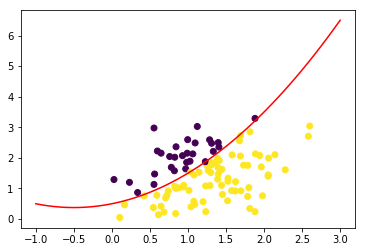

In [7]:
x = np.linspace(-1.0, 3.0)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.plot(x, z(x), color='red')

In [8]:
# Calculate cross-entropy
def cross_entropy(T, Y):
    return -np.mean(T * np.log(Y) + (1 - T) * np.log(1 - Y))

# error on untrained model
cross_entropy(data[:, 2], Y)

1.3312595817288877

## Train the model

### Split into training set and validation set

In [9]:
M = 30

X_train = data_wo_labels[:-M, :]
T_train = data[:-M, 2]

X_test = data_wo_labels[-M:, :]
T_test = data[-M:, 2]

### Plot the train and test data

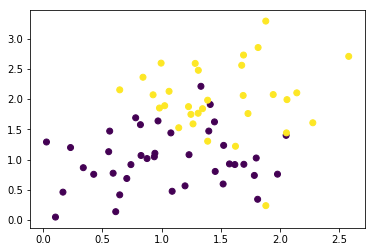

In [10]:
plt.scatter(X_train[:, 1], X_train[:, 3], c=T_train)
plt.show()

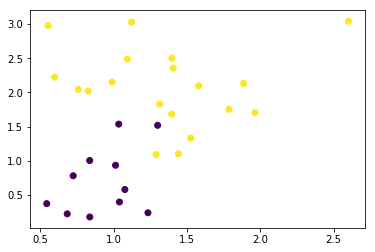

In [11]:
plt.scatter(X_test[:, 1], X_test[:, 3], c=T_test)
plt.show()

### Gradient descent

In [12]:
print(X_train.shape)

# initial parameters
W = [1.0, 1.0, 1.0, -1.0]

# training rate
alpha = 0.01

# error_delta
err_delta = 0.001

# get starting error
Y_train = predict(X_train, W)
err_prev = cross_entropy(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 10 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_W = X_train.T.dot(T_train - Y_train)
    W = W + alpha * grad_W
    
    # re-evaluate model
    Y_train = predict(X_train, W)
    err = cross_entropy(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

(70, 4)
error: 1.5204902695953717
error: 0.7282372577980845
error: 0.597352779995114
error: 0.5255001224849698
error: 0.4807819953028762
error: 0.4508329783263479
error: 0.4296313919785889
error: 0.41396581124960813
error: 0.4019973902737041
final error: 0.39894818871648613
iterations: 83


### Validate the model

In [13]:
Y_test = predict(X_test, W)
validation_err = cross_entropy(T_test, Y_test)
validation_err

0.3387889240930914

### Plot the final classificator

On complete dataset

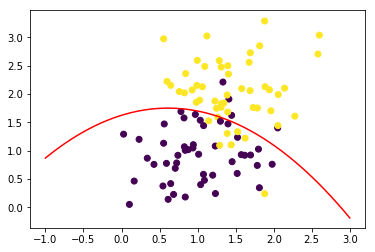

In [14]:
x = np.linspace(-1.0, 3.0)
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2])
plt.plot(x, z(x), color='red')

On test data

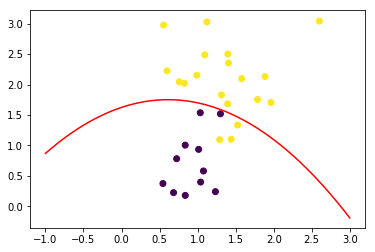

In [15]:
x = np.linspace(-1.0, 3.0)
plt.scatter(X_test[:, 1], X_test[:, 3], c=T_test)
plt.plot(x, z(x), color='red')
plt.show()

### Confusion matrix

In [16]:
labels = getClass(Y_test, 0.5)

tp = np.where((labels == 1.0) & (T_test == 1.0), 1, 0).sum()
tn = np.where((labels == 0.0) & (T_test == 0.0), 1, 0).sum()
fp = np.where((labels == 1.0) & (T_test == 0.0), 1, 0).sum()
fn = np.where((labels == 0.0) & (T_test == 1.0), 1, 0).sum()

In [17]:
conf_matrix = np.array([[tp, fp], [fn, tn]])
conf_matrix

array([[16,  0],
       [ 3, 11]])

### Precision and recall

In [18]:
p = tp / (tp + fp)
r = tp / (tp + fn)
f1 = 2 * r * p / (r + p)

print("Precision: " + str(p))
print("Recall: " + str(r))
print("F1 score: " + str(f1))

Precision: 1.0
Recall: 0.8421052631578947
F1 score: 0.9142857142857143


## Conclusions

Gradient descent with learning rate = 0.01 allowed training model in 83 iterations, achieving error of 0.339 on validation set
Given the threshold of 0.5, the model achieved precision of 1.0 and recall of 0.84